# Weekly assignment 1: data cleaning and exploratory data analysis

In this assignment we're going to merge two datafiles, clean them and explore the relations between the variables.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")

In [3]:
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [5]:
df = survey.merge(steps, on="id")
df = df[(df["weight"] < 150) & (df["weight"] > 50)]
df = df.fillna(0)

In [6]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df2 = df
df2 = df2[(df.iloc[:,9:] > 0)]
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.insert(9, "mean", df.iloc[:,9:].apply(pd.Series.mean, axis=1))
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,mean,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


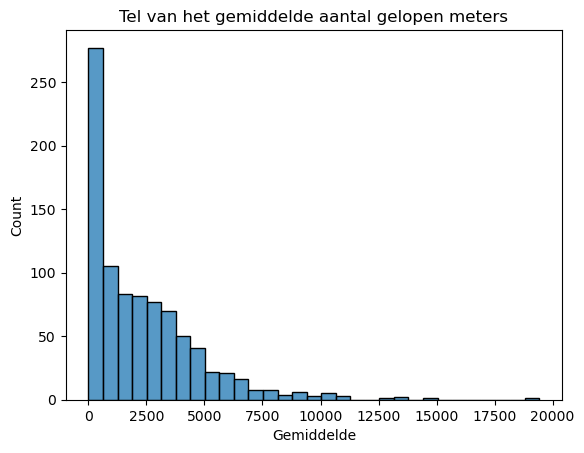

In [9]:
fig_histplot_mean = plt.figure()
sns.histplot(data=(df['mean']))
plt.xlabel("Gemiddelde")
plt.ylabel("Count")
plt.title("Tel van het gemiddelde aantal gelopen meters")
plt.show(fig_histplot_mean)

In [10]:
df.iloc[:,10:].apply(pd.Series.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
0,328.0,5133.875000,6407.990380,0.0,0.0,20.5,9865.00,35195.0
1,328.0,2826.371951,3883.482023,0.0,0.0,0.0,5333.50,18992.0
2,328.0,3745.902439,5230.821803,0.0,0.0,0.0,7666.50,23039.0
3,328.0,221.536585,1180.637284,0.0,0.0,0.0,0.00,11396.0
4,328.0,874.557927,2532.883340,0.0,0.0,0.0,0.00,18392.0
...,...,...,...,...,...,...,...,...
924,328.0,1742.908537,3320.349970,0.0,0.0,0.0,1643.00,15535.0
925,328.0,731.689024,2209.264015,0.0,0.0,0.0,0.00,15637.0
926,328.0,6268.954268,6768.681226,0.0,0.0,5629.0,10033.25,31014.0
927,328.0,3872.115854,8265.753567,0.0,0.0,0.0,0.00,48884.0


In [29]:
df["mean"].describe()

count      886.000000
mean      2329.183102
std       2403.326524
min          0.000000
25%        434.837652
50%       1626.439024
75%       3458.894055
max      19430.237805
Name: mean, dtype: float64

In [30]:
df["mean"].mode()

0    0.0
Name: mean, dtype: float64

In [31]:
df["mean"].var()

5775978.379036903

Measure of central tendency & Variantion
    Mode = 0
    Median = 1626.44
    Mean = 2329.18
    Varience = 5775978.38

Verbal description of distribution
Het gemiddelde welke is uitgedraaid in de bovenstaande histplot is normaalverdeeld met een skewness die links ligt. Dit betekend dat het merendeel van de deelnemers inactief zijn geweest of niet altijd de fitbit hebben gedragen gedurende de proef.
Verder zijn er uitschieters tussen de 17500 en 25000 welke veroorzaakt kunnen worden door zeer actieve deelnemers of mogelijke incorrecte data vanwege defecte fitbits.

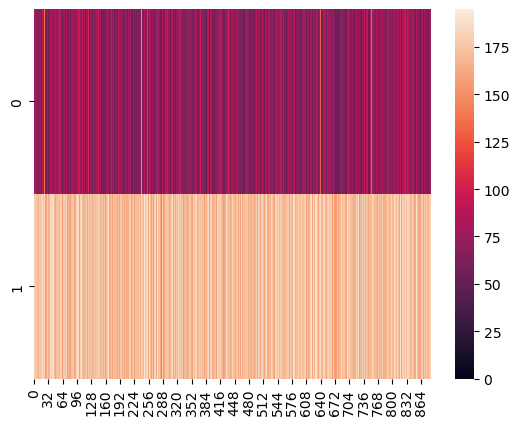

In [13]:
m = np.array([df["weight"], df["height"]])
fig_heatmap = sns.heatmap(m)
#tickervalue_weight = [50+10*i for i in range(10)]
#tickervalue_height = [140+10*i for i in range(6)]
#plt.xticks(ticks = tickervalue_height)
#plt.yticks(ticks = tickervalue_weight)
plt.show()

Graag hulp bij het correct uitdraaien van de bovenstaande heatmap.

In [14]:
df["gender_code"]= df["gender"].astype('category').cat.codes
df["city_code"]= df["city"].astype('category').cat.codes
df["age_code"]= df["age"].astype('category').cat.codes
df["education_1_code"]= df["education_1"].astype('category').cat.codes
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,mean,...,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,gender_code,city_code,age_code,education_1_code
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,...,0.0,6227.0,4567.0,2567.0,1129.0,0.0,1,3,0,2
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,5,0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,0,0


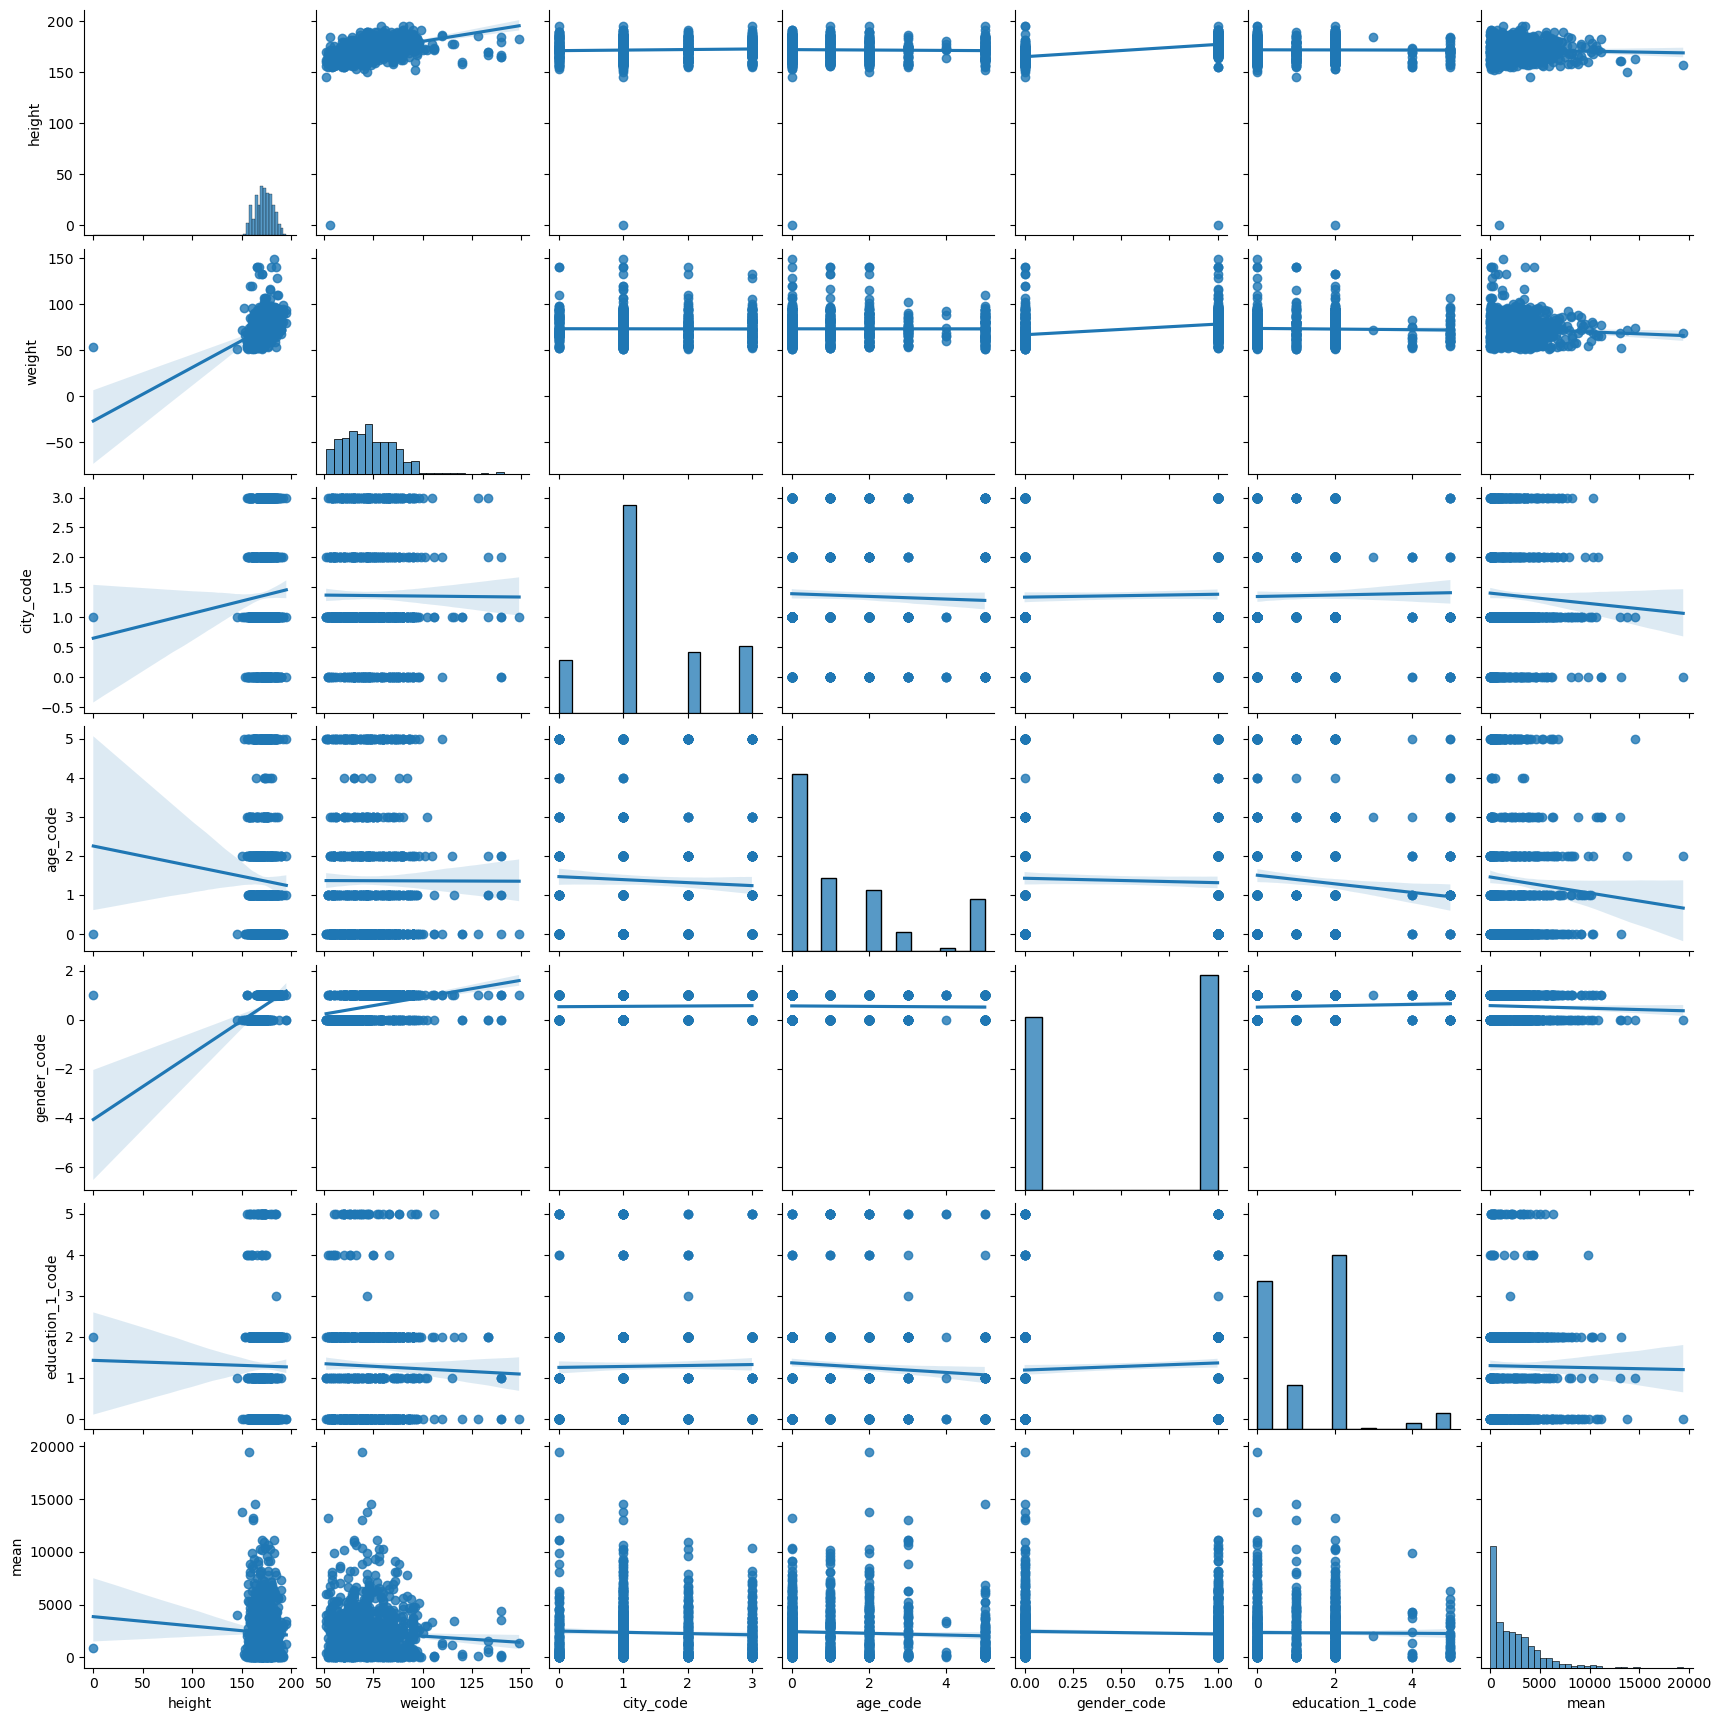

In [15]:
sns.pairplot(df[["height", "weight", "city_code", "age_code", "gender_code", "education_1_code", "mean"]], kind="reg")

The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
    Describe and interpret the results
        Uit de bovenstaande scatterplots is te concluderen dat er geen correlatie is tussen enkele independent variabele en het gemiddelde aantal stappen.

C:\Users\joost\AppData\Local\Temp\ipykernel_18304\2368090718.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df["weight"] < 125) & (df["weight"] > 0)]


<AxesSubplot:xlabel='height', ylabel='mean'>

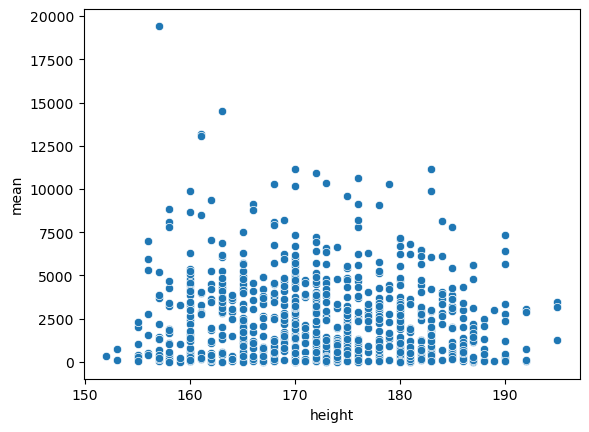

In [16]:
df2 = df
df2 = df2[(df["height"] < 200) & (df["height"] > 150)]
df2 = df2[(df["weight"] < 125) & (df["weight"] > 0)]

sns.scatterplot(x=df2["height"], y=df2["mean"])

<AxesSubplot:xlabel='weight', ylabel='mean'>

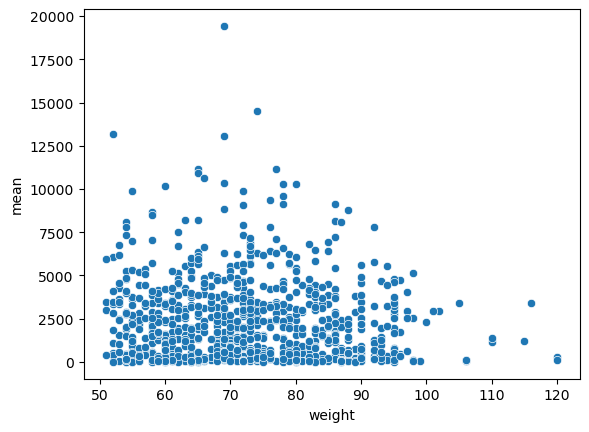

In [17]:
sns.scatterplot(x=df2["weight"], y=df2["mean"])


In [18]:
from sklearn.linear_model import LinearRegression
x = df[['height',"weight"]] 
y = df['mean']
lm = LinearRegression()
lm = lm.fit(x, y)

In [19]:
df['mean_p'] = lm.predict(x)
df.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight,mean,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,gender_code,city_code,age_code,education_1_code,mean_p
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,...,0.0,0.0,0.0,0.0,0.0,1,0,0,2,2038.115080
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,2266.681368
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,...,6227.0,4567.0,2567.0,1129.0,0.0,1,3,0,2,2199.995567
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,...,0.0,0.0,0.0,0.0,0.0,1,2,5,0,2238.172484
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,...,0.0,0.0,0.0,0.0,0.0,0,3,0,0,2475.931278
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,5554.884146,...,0.0,0.0,0.0,0.0,0.0,1,1,1,5,2446.451653
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,790.692073,...,0.0,0.0,0.0,0.0,0.0,1,3,0,2,2300.995010
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,635.533537,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2,2180.679188
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0,2972.006098,...,3996.0,2556.0,302.0,2442.0,0.0,0,1,1,5,2374.931835
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,265.554878,...,0.0,0.0,0.0,0.0,0.0,0,1,0,2,2125.107687


In [20]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df['mean'], df['mean_p'])

0.005145176855622324

Exploratory data analysis
    Describe and interpret the results
        De R-waarde ofwel correlatie tussen de gemiddelde aantal stappen (dependent),  de lengte (independent) en het gewicht (independent) van de deelnemers is 0.0051.
        Hieruit kan geconcludeerd worden dat er geen correlatie is tussen deze variabele.

Predictive model
    Explain linear regression in your own words
        Middels lineaire regressie proberen we verbanden tussen verschillende variabele te zoeken en te interpeteren middels grafieken en formules. 


In [21]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(df['mean'], df['mean_p']))

2395.7826128538527

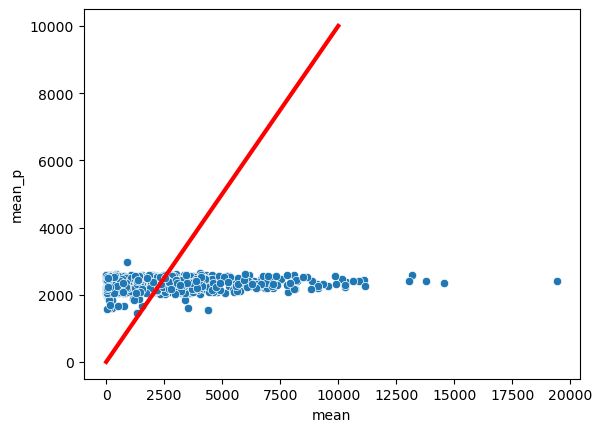

In [39]:
fig_1 = sns.scatterplot(x='mean',y='mean_p',data=df)
#plt.xlim(0, 20000)
#plt.ylim(0, 20000)
plt.plot([0, 1e4], [0, 1e4], color='red', lw=3)
plt.show(fig_1)

Evaluation
    Describe and interpret the results
        In de hierboven weergeven scatterplot is te zien dat de voorspelde waardes niet overeen komen met het werkelijke gemiddelde. Bij een hoge correlatie zou het figuur aantonen dat een gemiddelde van 1000 wordt voorspelt als waarde 1000.
        Daarbij zal de stip precies op de rode lijn komen te liggen. Dit is echter niet het geval wat dus nogmaals aantoont dat er geen correlatie is tusse de variabale gemiddelde aantal stappen, lengte, en gewicht.